In [1]:
import numpy as np
import xarray as xr
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
ds = xr.tutorial.open_dataset('air_temperature').load()

# Inspecting data

In [69]:
## Default
ds

## ncdump-style
#ds.info()

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Inspect the dimensions / coordinates / attributes of `ds` using `.dims` / `.coords` / `.attrs` 

Similarly, inspect the attributes of variable / DataArray `ds.air`

# Indexing data

In [46]:
## Numpy style
#ds.air[0,:,:]

## Pandas style, time
#ds.sel(time='2013-01-01')

## Pandas style, location
#ds.sel(lon=260, lat=50, method='nearest')

# Arithmetic
See documentation here: http://xarray.pydata.org/en/stable/computation.html#

Compute new variable `air2` which is the square of the air temperature

Compute new variable `airC` which is the temperature in Celcius

Compute the time mean over `air` and `airC` and store as `air_mean` and `airC_mean`

Compute the zonal mean of `airC` and name it `airC_zonal`. Verify its dimensions.

Now compute the standard deviation in time of `airC_zonal`, which will have one dimension (latitude)

# Plotting

Select the gridpoint closest to (lat,lon) = (50, 260) and plot the time evolution of temperature

Now plot the mean temperature over the entire region in a XY-diagram. 

Hint: Use the `dim=` keyword http://xarray.pydata.org/en/stable/computation.html#aggregation

Plot the 30-day rolling min/max/mean all together in a XY-diagram

http://xarray.pydata.org/en/stable/computation.html#rolling-window-operations

Make spatial plots of both the time mean variables that were computed earlier (`air_mean` and `airC_mean`)

Use `.plot(center=273.15)` to adjust the colorscheme of the plot in Kelvin.

# Output
Create a new dataset that contains both `air` and `airC` and write this to a netcdf file using the `.to_netcdf()` method. 

# More advanced stuff

Use the `xr.where()` function to find out which gridpoints see a temperature below freezing during any given point in time. 

http://xarray.pydata.org/en/stable/generated/xarray.where.html

The next bit of code computes the 4 seasonal means (DJF, MAM, JJA, SON)

In [41]:
t_season = ds.air.groupby('time.season').mean(dim='time') - 273.15

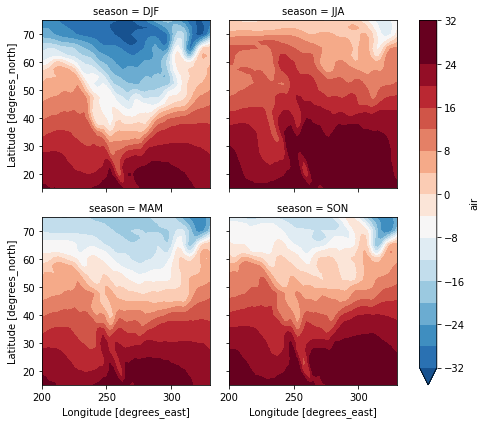

In [45]:
t_season.plot.contourf(x='lon', y='lat', col='season', col_wrap=2, levels=np.arange(-32,33,4))

Similarly, now plot the median (not mean) for 2 years in the dataset.

# Georeferenced plotting
This requires the Cartopy library to be installed

In [29]:
import cartopy.crs as ccrs

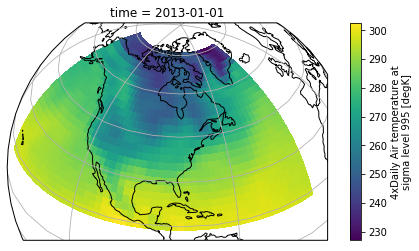

In [33]:
f = plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
# ax is an empty plot. We now plot the variable t_average onto ax# the keyword "transform" tells the function in which projection the air temp data is stored
ds.air[0].plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(); ax.gridlines();